200.09999999999292 299.78502049393677


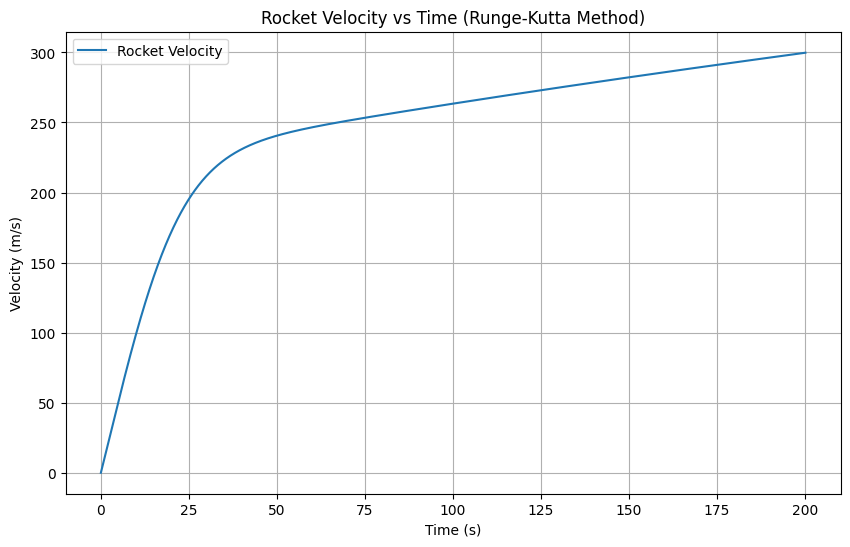

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nonlinear ODE of acceleration of rocket: dv/dt = -g - (k/m(t)) * v^2 + (r * v_e) / m(t)
def rocket_ode(t, v, m0, r, ve, k, g):
    m_t = m0 - r * t
    return -g - (k / m_t) * v**2 + (r * ve) / m_t

# Runge-Kutta 4th Order Method
def runge_kutta(f, t0, v0, tf, h, params):
    t_values = [t0]
    v_values = [v0]
    
    t = t0
    v = v0
    
    while t <= tf:
        k1 = h * f(t, v, *params)
        k2 = h * f(t + h/2, v + k1/2, *params)
        k3 = h * f(t + h/2, v + k2/2, *params)
        k4 = h * f(t + h, v + k3, *params)

        v += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h

        t_values.append(t)
        v_values.append(v)

    return np.array(t_values), np.array(v_values)

# Parameters
m0 = 500  # Initial mass (kg)
r = 2    # Fuel burn rate (kg/s)
ve = 5000 # Exhaust velocity (m/s)
k = 0.1   # Drag coefficient
g = 9.81  # Gravitational acceleration (m/s^2)

# Initial conditions and time span
t0 = 0
v0 = 0
tf = (m0 - 100) / r  # Burnout time when fuel is depleted
h = 0.1  # Time step

# Solve the ODE
t_values, v_values = runge_kutta(rocket_ode, t0, v0, tf, h, (m0, r, ve, k, g))
print(t_values[-1],v_values[-1])
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, v_values, label='Rocket Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Rocket Velocity vs Time (Runge-Kutta Method)')
plt.legend()
plt.grid(True)
plt.show()